# MPA-MLF, Miniproject 

## **Task - Classification of wireless transmitters**

The task will be to classify wireless transmitters based on data from measurement. We will use a multi-layer perceptron machine learning model to complete this exercise.
The dataset consists of 19200 samples and 12 features in total.

## Get Data

In [1]:
!wget https://raw.githubusercontent.com/tmarcak/MPA-MLF/main/Miniproject/x_train.csv
!wget https://raw.githubusercontent.com/tmarcak/MPA-MLF/main/Miniproject/y_train.csv
!wget https://raw.githubusercontent.com/tmarcak/MPA-MLF/main/Miniproject/x_test.csv
!wget https://raw.githubusercontent.com/tmarcak/MPA-MLF/main/Miniproject/sample_file.csv

--2023-03-30 12:21:32--  https://raw.githubusercontent.com/tmarcak/MPA-MLF/main/Miniproject/x_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2213327 (2.1M) [text/plain]
Saving to: ‘x_train.csv’

x_train.csv         100%[===================>]   2.11M  --.-KB/s    in 0.01s   

2023-03-30 12:21:32 (202 MB/s) - ‘x_train.csv’ saved [2213327/2213327]

--2023-03-30 12:21:32--  https://raw.githubusercontent.com/tmarcak/MPA-MLF/main/Miniproject/y_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127141 (124K) [text/plain

## Import Libraries

### Import libraries that will be used in this task.

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LeakyReLU, Dropout
from keras.optimizers import SGD, Adam, Nadam, Adamax
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import numpy as np
import cv2

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

## Load the Dataset

### Loading the dataset from paths.

In [3]:
# x_train
path_x_train = 'x_train.csv' 
x_train = pd.read_csv(path_x_train)

# y_train
path_y_train = 'y_train.csv' 
y_train = pd.read_csv(path_y_train)

# x_test
path_x_test = 'x_test.csv' 
x_test = pd.read_csv(path_x_test)

# sample file
path_sample_file = 'sample_file.csv' 
sample_file = pd.read_csv(path_sample_file)

## Data Examination

### Data reading.

In [4]:
x_train

,Unnamed: 0,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,m_power,ph_err,mag_err,evm,Tosc,Tmix
0,0,592.234802,0.048079,-35.082729,-28.560846,1.993170,-0.499721,1.107926,1.507550,2.423943,39.9,47.6
1,1,-103.302032,-0.019917,-29.946953,-35.798664,-3.642311,-0.928193,1.236059,2.741568,3.458056,14.8,23.1
2,2,-582.331299,0.036379,-32.096672,-31.905628,2.835839,-1.272485,1.282163,2.140096,3.013522,42.5,48.6
3,3,-630.611267,0.063928,-38.216297,-30.084171,1.346316,-0.596438,1.154848,1.093465,2.254514,26.1,35.4
4,4,-415.526978,-0.055761,-29.180740,-36.601025,-3.963526,0.113055,1.498889,3.608737,4.286684,24.2,40.8
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,15355,-476.575653,0.039874,-39.792461,-29.962997,1.143736,-0.688359,1.175517,1.044636,2.224311,24.6,33.8
15356,15356,-345.645508,0.077925,-32.963398,-27.998444,2.524010,-1.135376,1.159356,1.948950,2.761400,55.1,62.7
15357,15357,-613.989807,0.090771,-38.951530,-28.111988,1.145893,0.352151,0.995857,0.938308,1.939818,39.5,46.9
15358,15358,-997.769531,0.099840,-39.532818,-27.819826,1.014136,0.040398,1.069736,0.875986,2.026062,51.7,58.4


In [5]:
y_train

,id,target
0,0,5
1,1,1
2,2,6
3,3,3
4,4,2
...,...,...
15355,15355,3
15356,15356,8
15357,15357,7
15358,15358,7


In [6]:
x_test

,Unnamed: 0,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,m_power,ph_err,mag_err,evm,Tosc,Tmix
0,0,516.312866,0.055910,-34.748932,-28.086121,2.064618,-0.382014,1.166067,1.528550,2.541858,42.7,50.0
1,1,-452.875031,0.091061,-31.916044,-29.092400,2.843033,-0.585288,1.242625,2.044024,2.974349,28.8,37.3
2,2,543.581909,0.067271,-34.311523,-28.395725,2.160502,-0.272394,1.031588,1.615977,2.427548,29.3,37.8
3,3,-711.415710,0.001931,-30.205307,-35.895462,-3.537908,-1.061280,1.260278,2.586169,3.350533,31.9,42.6
4,4,-912.994873,0.054695,-31.485973,-33.110847,3.031799,-0.778807,1.343741,2.222488,3.199810,18.3,24.6
...,...,...,...,...,...,...,...,...,...,...,...,...
3835,3835,-1129.111816,0.071651,-40.088821,-27.627096,1.045999,0.031089,0.959680,0.863437,1.836749,56.4,63.8
3836,3836,-201.570984,-0.013889,-30.041744,-36.312626,-3.603977,-0.700542,1.277607,2.666203,3.413867,19.5,28.6
3837,3837,-434.601959,-0.067320,-29.236820,-37.041874,-3.929963,0.250709,1.581971,3.663174,4.409636,5.7,19.7
3838,3838,-507.450348,0.106392,-35.374168,-29.681749,1.821150,-0.952219,1.218159,1.373915,2.490288,43.7,51.4


In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15360 entries, 0 to 15359
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15360 non-null  int64  
 1   cfo_demod   15360 non-null  float64
 2   gain_imb    15360 non-null  float64
 3   iq_imb      15360 non-null  float64
 4   or_off      15360 non-null  float64
 5   quadr_err   15360 non-null  float64
 6   m_power     15360 non-null  float64
 7   ph_err      15360 non-null  float64
 8   mag_err     15360 non-null  float64
 9   evm         15360 non-null  float64
 10  Tosc        15360 non-null  float64
 11  Tmix        15360 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.4 MB


In [8]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15360 entries, 0 to 15359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      15360 non-null  int64
 1   target  15360 non-null  int64
dtypes: int64(2)
memory usage: 240.1 KB


In [9]:
classes = len(y_train['target'].unique())

### Columns dropping (Unnamed, m_power, Tosc, Tmix).

In [10]:
drop_columns_x = ['Unnamed: 0', 'm_power', 'Tosc', 'Tmix']

x_train = x_train.drop(drop_columns_x, axis=1)
x_test = x_test.drop(drop_columns_x, axis=1)

drop_columns_y = 'id'

y_train = y_train.drop(drop_columns_y, axis=1)

In [11]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)

x_train: (15360, 8)
y_train: (15360, 1)
x_test: (3840, 8)


In [12]:
x_train.head(11)

,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,592.234802,0.048079,-35.082729,-28.560846,1.993170,1.107926,1.507550,2.423943
1,-103.302032,-0.019917,-29.946953,-35.798664,-3.642311,1.236059,2.741568,3.458056
2,-582.331299,0.036379,-32.096672,-31.905628,2.835839,1.282163,2.140096,3.013522
3,-630.611267,0.063928,-38.216297,-30.084171,1.346316,1.154848,1.093465,2.254514
4,-415.526978,-0.055761,-29.180740,-36.601025,-3.963526,1.498889,3.608737,4.286684
5,-432.158600,-0.030759,-29.860676,-36.194633,-3.675441,1.537498,3.449937,4.194931
6,-1121.172485,0.080203,-39.686409,-27.786304,1.063713,1.197557,0.900188,2.079625
7,-60.408207,0.097589,-31.729502,-29.707535,2.926517,1.300429,2.170298,3.130086
8,-162.684296,0.117599,-32.867283,-28.412897,2.533771,1.259792,1.939059,2.873458
9,-460.115356,0.097939,-38.504665,-30.381096,1.198071,1.201420,1.040533,2.311378


In [13]:
y_train.head(11)

,target
0,5
1,1
2,6
3,3
4,2
5,2
6,7
7,8
8,8
9,3


In [14]:
x_test.head(11)

,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,516.312866,0.055910,-34.748932,-28.086121,2.064618,1.166067,1.528550,2.541858
1,-452.875031,0.091061,-31.916044,-29.092400,2.843033,1.242625,2.044024,2.974349
2,543.581909,0.067271,-34.311523,-28.395725,2.160502,1.031588,1.615977,2.427548
3,-711.415710,0.001931,-30.205307,-35.895462,-3.537908,1.260278,2.586169,3.350533
4,-912.994873,0.054695,-31.485973,-33.110847,3.031799,1.343741,2.222488,3.199810
5,-127.396454,0.076116,-32.822315,-28.556459,2.569385,1.185854,1.946423,2.825569
6,-327.839325,0.079020,-35.681488,-29.708097,1.810301,1.250853,1.405979,2.601677
7,-284.483307,-0.026575,-30.071457,-35.786987,-3.588561,1.232498,2.697076,3.417039
8,-258.876770,-0.012376,-30.484192,-36.661945,-3.425236,1.153064,2.579239,3.210146
9,-342.999878,0.048045,-46.655155,-30.486408,0.428036,1.072514,0.623592,1.866601


## Data Preprocessing

### Scaling

In [15]:
x_scale = preprocessing.MinMaxScaler()

x_train_column = x_train.columns
x_train_values = x_scale.fit_transform(x_train.values)
x_train = pd.DataFrame(x_train_values, columns=x_train_column)

In [16]:
x_train.head(11)

,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,0.930809,0.542445,0.760654,0.844057,0.824101,0.023830,0.109756,0.044470
1,0.599548,0.299964,0.945212,0.343402,0.088250,0.035936,0.230634,0.103537
2,0.371403,0.500723,0.867960,0.612692,0.934132,0.040292,0.171717,0.078146
3,0.348409,0.598966,0.648047,0.738686,0.739638,0.028263,0.069194,0.034793
4,0.450846,0.172137,0.972746,0.287901,0.046307,0.060769,0.315578,0.150866
5,0.442925,0.261300,0.948312,0.316012,0.083924,0.064417,0.300023,0.145626
6,0.114771,0.657005,0.595217,0.897634,0.702737,0.032298,0.050261,0.024804
7,0.619977,0.719003,0.881155,0.764738,0.945972,0.042018,0.174675,0.084804
8,0.571267,0.790362,0.840268,0.854291,0.894690,0.038179,0.152024,0.070146
9,0.429610,0.720252,0.637684,0.718147,0.720281,0.032663,0.064009,0.038041


In [17]:
x_test_values = x_scale.fit_transform(x_test.values)
x_test = pd.DataFrame(x_test_values, columns=x_train_column)

In [18]:
x_test.head(11)

,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,0.900080,0.831951,0.767681,0.892258,0.840250,0.036315,0.179878,0.063664
1,0.430066,0.909459,0.871589,0.821504,0.942545,0.045914,0.261912,0.094728
2,0.913305,0.857002,0.783725,0.870489,0.852851,0.019454,0.193791,0.055454
3,0.304685,0.712926,0.934338,0.343164,0.103999,0.048127,0.348190,0.121748
4,0.206928,0.829272,0.887364,0.538957,0.967351,0.058592,0.290313,0.110922
5,0.587909,0.876505,0.838348,0.859187,0.906583,0.038796,0.246379,0.084042
6,0.490703,0.882909,0.733475,0.778213,0.806829,0.046945,0.160371,0.067961
7,0.511729,0.650070,0.939247,0.350791,0.097343,0.044644,0.365841,0.126525
8,0.524147,0.681379,0.924109,0.289271,0.118806,0.034685,0.347088,0.111665
9,0.483351,0.814607,0.330969,0.723488,0.625180,0.024586,0.035860,0.015163


In [19]:
y_train = to_categorical(y_train - 1, num_classes = classes)
y_train = pd.DataFrame(y_train)

In [20]:
y_train.head(6)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model building

In [21]:
model = Sequential()

model.add(Flatten(input_shape=(classes, 1)))
model.add(Dense(3072, activation='gelu'))    
model.add(Dense(64, activation='gelu'))
model.add(Dense(classes, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 3072)              27648     
                                                                 
 dense_1 (Dense)             (None, 64)                196672    
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
Total params: 224,840
Trainable params: 224,840
Non-trainable params: 0
_________________________________________________________________



### Optimization

In [23]:
optimizer = Adamax(learning_rate = 0.01, epsilon = 0.2, beta_1=0.9, beta_2=0.999)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## Model Training

In [24]:
history = model.fit(x_train, y_train, epochs=40, batch_size=50, validation_split = 0.2)

Epoch 1/40
246/246 [==============================] - 10s 13ms/step - loss: 1.9690 - accuracy: 0.2906 - val_loss: 1.7905 - val_accuracy: 0.3747
Epoch 2/40
246/246 [==============================] - 2s 7ms/step - loss: 1.4732 - accuracy: 0.6036 - val_loss: 1.1809 - val_accuracy: 0.7842
Epoch 3/40
246/246 [==============================] - 1s 3ms/step - loss: 0.8868 - accuracy: 0.8534 - val_loss: 0.6240 - val_accuracy: 0.9515
Epoch 4/40
246/246 [==============================] - 1s 3ms/step - loss: 0.4749 - accuracy: 0.9497 - val_loss: 0.3550 - val_accuracy: 0.9535
Epoch 5/40
246/246 [==============================] - 1s 4ms/step - loss: 0.2908 - accuracy: 0.9702 - val_loss: 0.2387 - val_accuracy: 0.9727
Epoch 6/40
246/246 [==============================] - 1s 4ms/step - loss: 0.2017 - accuracy: 0.9750 - val_loss: 0.1704 - val_accuracy: 0.9805
Epoch 7/40
246/246 [==============================] - 1s 4ms/step - loss: 0.1512 - accuracy: 0.9803 - val_loss: 0.1326 - val_accuracy: 0.9883
Epoc

## Model Evaluation

In [25]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.016228895634412766
Test accuracy: 99.72005486488342 %


### Figures

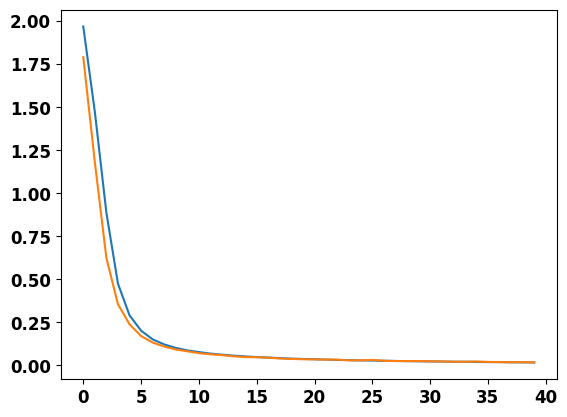

In [26]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

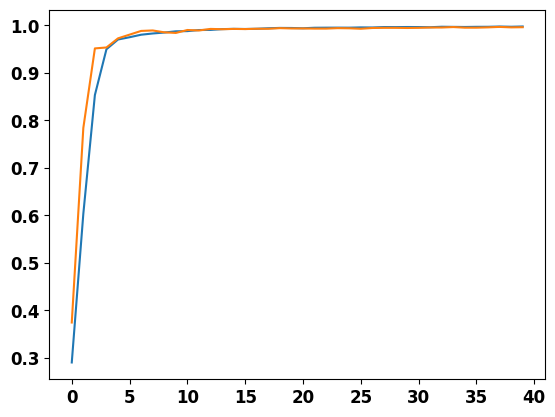

In [27]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## Output

In [28]:
model_predictions = model.predict(x_test)

id = np.argmax(model_predictions, axis=-1)
prediction = id + 1
prediction = pd.DataFrame({'id': np.arange(0, len(prediction)), 'target': prediction})

120/120 [==============================] - 0s 1ms/step


## Final File

In [29]:
prediction.to_csv('model_predictions.csv', index=False)